# Analysis of Latin America authors
## For papers with less than 10 authors

<img src="https://raw.githubusercontent.com/restrepo/inspire/master/img/authors.svg" width=500>

In [1]:
%pylab inline
plt.rc('axes', axisbelow=True)

Populating the interactive namespace from numpy and matplotlib


Load the data

In [2]:
import pandas as pd
from inspirehep import hIndex
df=pd.read_json('data/inspire_LA.json')
#df=df.rename( dict(zip(df.columns,[c.replace('LA_','') for c in df.columns])) ,axis='columns')

Prepare the data

In [33]:
c='Colombia'
#c=''
if c:
    dc=df[df['country']==c].reset_index(drop=True)
else:
    dc=df.copy()
#Obtain the unique list of institution of a country
ic=set(dc['institution_id'].to_list())
#Filter the papers of a country for each author
dc['country_papers']=dc['papers'].apply(lambda l: [d for d in l if d.get('inst_id') in ic])
# Extract years of the list of country papers of each author
dc['years']=dc['country_papers'].apply(lambda l: [eval(d.get('year')) for d in l if d.get('year')!='None'])
dc['year_max']=dc['years'].apply(lambda l: max(l) if l else 0)
dc['year_min']=dc['years'].apply(lambda l: min(l) if l else 0)
year_min=dc[dc['year_min']>0]['year_min'].min()
year_max=dc['year_max'].max()

## Visualizations
1. Number of active researchers of country per year

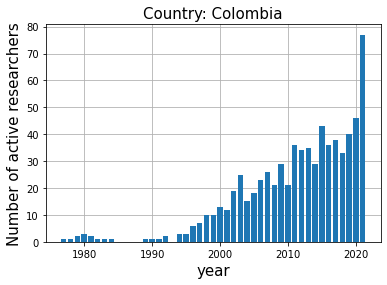

In [34]:
rs=[]
for y in range(year_min,year_max+1):
    rs.append( {'year':y, 'authors':dc[dc['years'].apply(lambda l: y in l)].shape[0]} )

rs=pd.DataFrame(rs)
rs=rs[rs['year']<year_max]

plt.bar(rs['year'],rs['authors'])
plt.ylabel('Number of active researchers',size=15)
plt.xlabel('year',size=15)
plt.title(f'Country: {c}',size=15)
plt.grid()

2. Number of papers of country per year and h-index of country

In [30]:
ctp=pd.DataFrame( list(dc['country_papers'].apply(pd.Series).stack().values) ).drop_duplicates().reset_index(drop=True)

Text(0, 0.5, 'Number of papers')

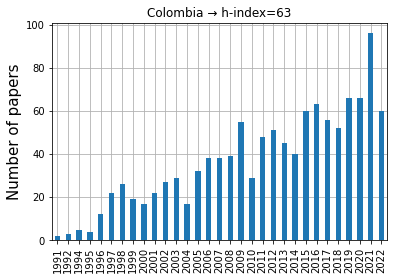

In [31]:
kk=ctp[ctp['year'].apply(eval)>1990]['year'].value_counts().sort_index().plot(kind='bar')
plt.grid()
plt.title(f'{c} → h-index={hIndex(ctp.citation_count)}')
plt.ylabel('Number of papers',size=15)